In [30]:
import pandas as pd
import numpy as np

In [109]:
data = pd.read_csv("./slide10_dataset.csv")

In [116]:
data

,Temperature,Outlook,Humidity,Windy,Played
0,Mild,Sunny,80,0,1
1,Hot,Sunny,75,1,0
2,Hot,Overcast,77,0,1
3,Cool,Rain,70,0,1
4,Cool,Overcast,72,1,1
5,Mild,Sunny,77,0,0
6,Cool,Sunny,70,0,1
7,Mild,Rain,69,0,1
8,Mild,Sunny,65,1,1
9,Mild,Overcast,77,1,1


In [111]:
test = data.Temperature

In [70]:
def calcEntropy(a,b):
    if a == 0 or b == 0:
        return 0
    return (-a*np.log2(a))-(b*np.log2(b))

In [126]:
def findEntropyIG(c1, c2, df):
    col1 = df[c1]
    col2 = df[c2]
    table = pd.DataFrame(index = col2.unique(), columns= col1.unique())
    table['Total'] = np.nan
    for i in table.index:
        for j in table.columns.drop('Total'):
            count = len(df[(df[c2] == i) & (df[c1] == j)])   
            table.loc[i,j] = count
    #get total
    for i in range(len(table.index)):
        table.iloc[i,-1] = int(sum(table.drop(columns='Total').iloc[i]))
        
    entropy, probability = [], []
    #calculate entropies and probabilities
    for i in table.index:
        numerators = []
        for j in table.drop(columns='Total').columns:
            numerators.append(table.loc[i,j])
        temp = 0
        total = table.loc[i,'Total']
        probability.append(total/df.shape[0])
        entropy.append(calcEntropy(numerators[0]/total, numerators[1]/total))
    
    final_calc = sum([entropy[i] * probability[i] for i in range(len(entropy))])
    
    c1_count = [df[c1].value_counts()[i] for i in df[c1].unique()]
    
    IG = calcEntropy(c1_count[0]/df.shape[0],c1_count[1]/df.shape[0]) - final_calc

    print(f'E({c1},{c2}) = {final_calc}\nIG = {IG}')

In [127]:
tempHum = data['Humidity'].map(str)

for i in range(len(tempHum)):
    if int(tempHum[i]) >= 75:
        tempHum[i] = '>=75'
    else:
        tempHum[i] = '<75'

In [128]:
data_hum = data.drop(columns='Humidity')
data_hum['Humidity'] = tempHum

In [129]:
data_hum

,Temperature,Outlook,Windy,Played,Humidity
0,Mild,Sunny,0,1,>=75
1,Hot,Sunny,1,0,>=75
2,Hot,Overcast,0,1,>=75
3,Cool,Rain,0,1,<75
4,Cool,Overcast,1,1,<75
5,Mild,Sunny,0,0,>=75
6,Cool,Sunny,0,1,<75
7,Mild,Rain,0,1,<75
8,Mild,Sunny,1,1,<75
9,Mild,Overcast,1,1,>=75


In [130]:
findEntropyIG("Played", "Outlook", data)

E(Played,Outlook) = 0.6935361388961918
IG = 0.16958442967043919


In [131]:
findEntropyIG("Played", "Windy", data)

E(Played,Windy) = 0.7391796818283407
IG = 0.12394088673829029


In [132]:
findEntropyIG("Played", "Temperature", data)

E(Played,Temperature) = 0.8601317128547441
IG = 0.0029888557118868953


In [133]:
findEntropyIG("Played", "Humidity", data_hum)

E(Played,Humidity) = 0.7884504573082896
IG = 0.07467011125834144


Outlook as the most information gain at the beginning. Therefore we will use Outlook as the root node. Notice that when the Outlook is 'Overcast,' they will always play with my feelings. Thus we can simply end at yes in that case. We will now continue with each attribute of Outlook.

In [148]:
sunny_df = data_hum[data_hum.Outlook == 'Sunny']

In [149]:
sunny_df

,Temperature,Outlook,Windy,Played,Humidity
0,Mild,Sunny,0,1,>=75
1,Hot,Sunny,1,0,>=75
5,Mild,Sunny,0,0,>=75
6,Cool,Sunny,0,1,<75
8,Mild,Sunny,1,1,<75


In [150]:
findEntropyIG("Played", "Temperature", sunny_df)

E(Played,Temperature) = 0.5509775004326937
IG = 0.4199730940219749


In [151]:
findEntropyIG("Played", "Windy", sunny_df)

E(Played,Windy) = 0.9509775004326937
IG = 0.01997309402197489


In [152]:
findEntropyIG("Played", "Humidity", sunny_df)

E(Played,Humidity) = 0.5509775004326937
IG = 0.4199730940219749


Since I have the same value for Humidity and Temperature under Sunny conditions, I'm going to use Humidity because that's what the tree in the slides ended up choosing. :) When it is not humid, we have 100% play rate. That is not the case when it is humid.

In [158]:
not_humid_df = sunny_df[sunny_df.Humidity == '>=75']

In [159]:
not_humid_df

,Temperature,Outlook,Windy,Played,Humidity
0,Mild,Sunny,0,1,>=75
1,Hot,Sunny,1,0,>=75
5,Mild,Sunny,0,0,>=75


In [161]:
findEntropyIG("Played", "Temperature", not_humid_df)

E(Played,Temperature) = 0.6666666666666666
IG = 0.2516291673878229


In [162]:
findEntropyIG("Played", "Windy", not_humid_df)

E(Played,Windy) = 0.6666666666666666
IG = 0.2516291673878229


As you can see, we have no more information gain once going this route. Therefore we will just end it there and say "maybe she'll play with me today who knows."

Let us now calculate the IG under rainy conditions.

In [153]:
rain_df = data_hum[data_hum.Outlook == 'Rain']

In [154]:
rain_df

,Temperature,Outlook,Windy,Played,Humidity
3,Cool,Rain,0,1,<75
7,Mild,Rain,0,1,<75
11,Mild,Rain,1,0,>=75
12,Cool,Rain,1,0,<75
13,Mild,Rain,0,1,>=75


In [155]:
findEntropyIG("Played", "Temperature", rain_df)

E(Played,Temperature) = 0.9509775004326937
IG = 0.01997309402197489


In [156]:
findEntropyIG("Played", "Windy", rain_df)

E(Played,Windy) = 0.0
IG = 0.9709505944546686


In [157]:
findEntropyIG("Played", "Humidity", rain_df)

E(Played,Humidity) = 0.9509775004326937
IG = 0.01997309402197489


Under rain, we will check for Windy conditions. We now notice that in the rain_df, when it is windy, they don't play with my feelings, but when it is not windy, they do play with my feelings :(

Thus we end at our final tree. Which is exactly the same as the tree in the slides except this time we calculate humidity with '>=75 and <75' rather than '<=75 and >75.'

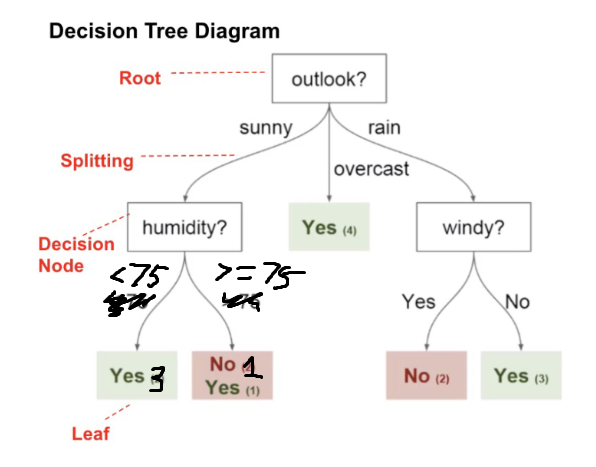